In [1]:
import numpy
import math
import pandas
df = pandas.read_csv("date.csv")
n = len(df)

In [2]:
def make_sample_data(n):
    f1 = numpy.random.rand(n)
    f2 = numpy.abs(numpy.random.normal(0, 0.018, n))
    p_list = []
    for v1, v2 in zip(f1, f2):
        if v1 >= 0.8:
            p = 1
        elif v1 >= 0.6 and numpy.random.rand() >= 0.2:
            p = 1
        elif v1 >= 0.6:
            p = -1
        elif v1 >= 0.4:
            p = 0
        elif v1 >= 0.2 and numpy.random.rand() >= 0.2:
            p = -1
        elif v1 >= 0.2:
            p = 1
        else:
            p = -1
        p_list.append(p)
    profit = f2 * numpy.array(p_list)
    df = pandas.DataFrame({"f1": f1, "f2": f2, "profit": profit})
    return df

In [3]:
for i in range(1000):
    filename = str(i).zfill(4)
    f = make_sample_data(n)
    f["date"] = df["date"]
    if i < 500:
        f.to_csv("data/sample_train/{}.csv".format(filename), index=False)
    else:
        f.to_csv("data/sample_test/{}.csv".format(filename), index=False)

In [4]:
def _action(profit):
    if profit == 0:
        action = 0
    elif profit > 0:
        action = 1
    else:
        action = 2
    return action
f["action"] = f["profit"].apply(lambda x: _action(x))
action_0 = f.query("action == 0")
action_1 = f.query("action == 1")
action_2 = f.query("action == 2")

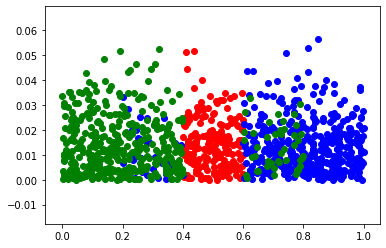

In [6]:
import matplotlib.pyplot as plt
plt.scatter(action_0["f1"], action_0["f2"], c="r")
plt.scatter(action_1["f1"], action_1["f2"], c="b")
plt.scatter(action_2["f1"], action_2["f2"], c="g")